In [1]:
import pathlib
import pickle

import seaborn as sb
import pandas as pd
import numpy as np
import pymc3 as pm
from cmocean import cm
import theano.tensor as tt
import matplotlib.pyplot as pl
from matplotlib import rcParams

/accounts/ekarakoy/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
% matplotlib inline

In [3]:
pl.style.use('fivethirtyeight')
rcParams['axes.labelsize'] = 16
rcParams['xtick.labelsize'] = 16
rcParams['ytick.labelsize'] = 16
rcParams['legend.fontsize'] = 16

In [4]:
home = pathlib.Path.home()
fs = home / 'DEV-ALL/Bayesian_Chl_Algorithms/pickleJar/NOMAD_AOP&IOPs.pkl'
with open(fs, 'rb') as f:
    datadict = pickle.load(f)
    d_aop = datadict['d_aop_imputed_rrs']

In [5]:
d_aop.describe().T

,count,mean,std,min,25%,50%,75%,max
doy,4459.0,162.926551,107.284396,2.850000,60.016667,154.225000,262.229167,365.450000
lat,4459.0,1.868658,44.765125,-77.035600,-61.299000,27.093000,34.458500,79.690000
lon,4459.0,-61.592062,53.894958,-179.955000,-82.699950,-67.675000,-63.961500,179.907000
etopo2,4459.0,1312.346715,1766.435289,0.000000,18.000000,240.000000,2789.500000,7978.000000
bathymetry,4459.0,-1335.069348,1754.667531,-7747.304199,-2801.958008,-321.559998,-46.526001,634.359985
oisst,4459.0,14.841534,10.374969,-1.800000,1.860000,16.380000,24.430000,30.890000
wtemp,1235.0,18.021513,8.203662,-1.880000,13.425000,18.090000,24.441000,36.250000
woa_sst_mean,2516.0,16.346622,9.908297,-1.459301,9.008673,17.161522,25.505406,29.414753
woa_sst_se,2516.0,0.038228,0.025942,0.008451,0.018678,0.029443,0.051658,0.174434
sal,672.0,28.717463,8.397708,0.080000,24.885000,33.250000,33.630000,37.010000


In [6]:
d_aop.head().T

,0,1,2,3,4
id,1565,1566,1567,1568,1559
datetime,2003-04-15 15:15:00,2003-04-15 16:50:00,2003-04-15 17:50:00,2003-04-17 18:15:00,2003-07-21 18:27:00
doy,105.875,106.5,106.542,108,203.2
lat,38.4279,38.368,38.3074,38.6367,38.3047
lon,-76.61,-76.5,-76.44,-76.32,-76.44
etopo2,0,0,1,3,1
bathymetry,-3.044,-10.44,-8.956,-10.008,-9.118
oisst,3.7,3.7,3.7,3.7,22.03
wtemp,NaN,NaN,NaN,NaN,NaN
woa_sst_mean,NaN,NaN,NaN,NaN,NaN


Take a subset of data corresponding to SWF bands, take the log of the bands, then try the following models:
* Rd2Bl
* MxBl2Rd
* Rd2MxBl
* MxBl2Gr

In [7]:
def compute_predictors(df):
    '''function to compute ratios mentioned above'''
    
    ins = df.shape[1]-2
    df.insert(ins, 'maxBlue', df.loc[:, ['rrs443', 'rrs489', 'rrs510']].max(axis=1))
    df.insert(ins, 'Rd2Bl', df.rrs670 / df.rrs411)
    df.insert(ins, 'mxBlu2Rd', df.maxBlue / df.rrs670)
    df.insert(ins, 'Rd2MxBlu', df.rrs670 / df.maxBlue)
    df.insert(ins, 'mxBlu2Gr', df.maxBlue / df.rrs555)

In [8]:
d = d_aop[['id','rrs411', 'rrs443', 'rrs489', 'rrs510' ,'rrs555', 'rrs670',
        'etopo2', 'oisst', 'chl']]

In [9]:
compute_predictors(d)

In [10]:
d.head().T

,0,1,2,3,4
id,1565,1566,1567,1568,1559
rrs411,0.0012044,0.00106171,0.000971132,0.0014718,0.000905091
rrs443,0.00168608,0.00138402,0.00118548,0.00174123,0.00102233
rrs489,0.00329309,0.00217292,0.0018432,0.00287731,0.00150593
rrs510,0.00403634,0.00249924,0.00228772,0.00366425,0.00190341
rrs555,0.00747919,0.00415208,0.00424561,0.0069817,0.00280069
rrs670,0.00346456,0.00169488,0.00161228,0.00323384,0.00179052
etopo2,0,0,1,3,1
mxBlu2Gr,0.539676,0.601926,0.538844,0.524837,0.679622
Rd2MxBlu,0.858341,0.678155,0.704753,0.882536,0.940694


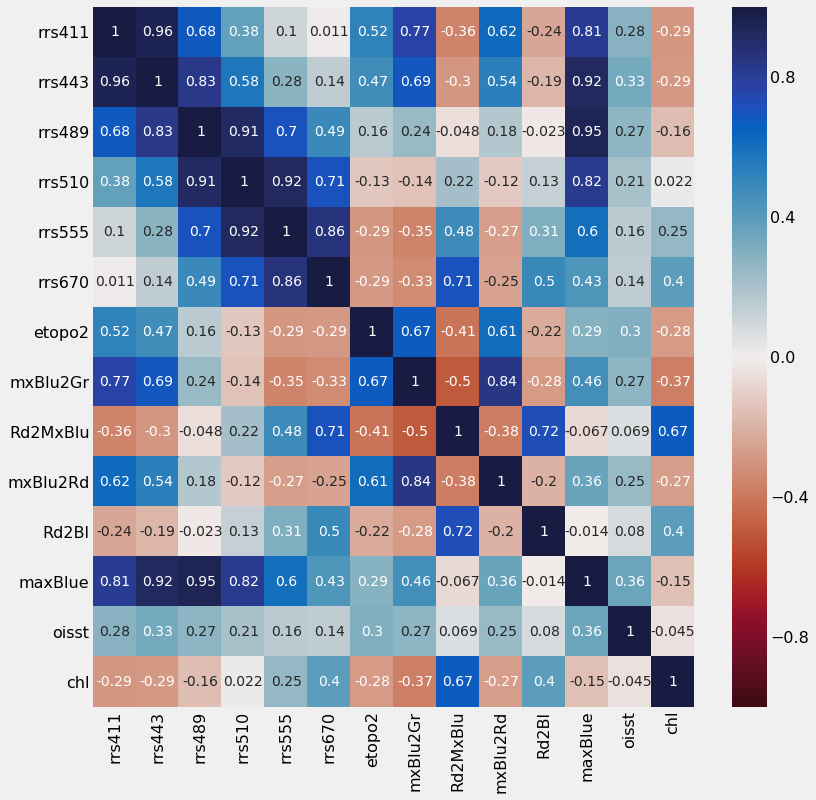

In [12]:
_, ax = pl.subplots(figsize=(12,12))
sb.heatmap(d.iloc[:, 1:].corr(), vmin=-1, vmax=1, annot=True,
          cmap=cm.balance_r);

In [49]:
d.loc[d.etopo2==0, 'etopo2'] = 1e-6
d.head()

/accounts/ekarakoy/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/accounts/ekarakoy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,rrs411,rrs443,rrs489,rrs510,rrs555,rrs670,chl,etopo2,oisst
0,0.001204,0.001686,0.003293,0.004036,0.007479,0.003465,38.19,0.000001,3.70
1,0.001062,0.001384,0.002173,0.002499,0.004152,0.001695,35.01,0.000001,3.70
2,0.000971,0.001185,0.001843,0.002288,0.004246,0.001612,26.91,1.000000,3.70
3,0.001472,0.001741,0.002877,0.003664,0.006982,0.003234,47.96,3.000000,3.70
4,0.000905,0.001022,0.001506,0.001903,0.002801,0.001791,23.55,1.000000,22.03


In [46]:
d_log.head()

,rrs411,rrs443,rrs489,rrs510,rrs555,rrs670,chl,etopo2,oisst
0,-6.721774,-6.385349,-5.715930,-5.512417,-4.895630,-5.665171,3.642574,-inf,1.308333
1,-6.847877,-6.582762,-6.131683,-5.991767,-5.484146,-6.380146,3.555634,-inf,1.308333
2,-6.937048,-6.737605,-6.296251,-6.080199,-5.461870,-6.430107,3.292498,0.000000,1.308333
3,-6.521267,-6.353163,-5.850900,-5.609131,-4.964462,-5.734086,3.870367,1.098612,1.308333
4,-7.007475,-6.885672,-6.498347,-6.264109,-5.877890,-6.325246,3.159126,0.000000,3.092405


In [47]:
d.describe().T

,count,mean,std,min,25%,50%,75%,max
rrs411,4293.0,0.004881,0.003447,0.000051,0.002509,0.003984,0.006301,0.030600
rrs443,4456.0,0.004652,0.003002,0.000190,0.002617,0.003899,0.006076,0.036769
rrs489,4422.0,0.004590,0.002768,0.000284,0.003051,0.004153,0.005655,0.063814
rrs510,4207.0,0.003878,0.002901,0.000261,0.002638,0.003272,0.004027,0.077740
rrs555,4453.0,0.003170,0.003681,0.000183,0.001551,0.002004,0.003135,0.108867
rrs670,3905.0,0.000762,0.001676,0.000000,0.000100,0.000200,0.000571,0.027700
chl,4127.0,2.680228,5.758436,0.012000,0.233325,0.764000,2.150000,77.864800
etopo2,4459.0,1312.346715,1766.435289,0.000000,18.000000,240.000000,2789.500000,7978.000000
oisst,4459.0,14.841534,10.374969,-1.800000,1.860000,16.380000,24.430000,30.890000


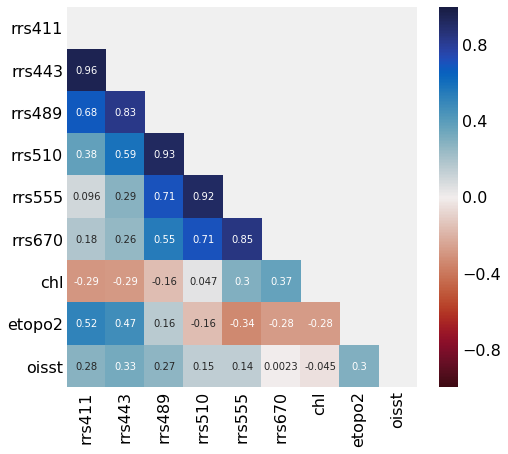

In [37]:
_, ax = pl.subplots(figsize=(7, 7))
sb.heatmap(d.corr(), vmin=-1, vmax=1, ax=ax, annot=True,
          mask=np.triu(np.ones([d.shape[1]])), cmap=cm.balance_r);

<u>References</u>

1 - dynamic biogeo

2 - importance of sst:  Brander, K. (2009), Impacts of climate change on marine ecosystems and fisheries, J. Mar. Biol. Ass. India, 51, 1–13.